<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>

<h1>Applied Text Mining and Sentiment Analysis with Python</h1>

Welcome! 

In this course we will discover different applications that can be made of text mining. We are going to use this knowledge to focus on a particular NLP application ... that may be a little less known: Sentiment Analysis! 

So, if you're ready. Let's go!

**PS**: don't hesitate to visit **www.AIOutsider.com** for more content!

**PS2**: sometimes, the runtime of Colab might expire. If you see an error, always make sure all the code in previous cells has run correctly. 




<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview



In this section, we are going to have a look at the dataset that we will use all along the course.

***Note***: for optimal course follow-up, you will need a Google Account with the Google Drive functionnality. If you don't have a Google Account, you can create a new one (it's totally *free*) or simply download the dataset ressource and manually upload it to the current session. 

If you prefer not to use any Google apps for this course, it's totally fine ... You can simply download this notebook together with the dataset and use them with your favourite IDE (Pycharm / Spyder / Jupyter Notebook / ...)! No constraint here 🙃

... In any case, enjoy!

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Connect to Google Drive


* Initiate the connection with Google Drive

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client
# # This only needs to be done once per notebook
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

* Specify the Google Drive file ID

In [ ]:
# # Download a file based on its file ID.

# # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# file_id = 'YOUR_FILE_ID' # Check your own ID in GDrive
# downloaded = drive.CreateFile({'id': file_id})

# # Save file in Colab memory
# downloaded.GetContentFile('tweet_data.csv')  

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyze Dataset

Very useful packages for Data Analysis. Don't hesitate to visit any of those sites in case you don't get what we are doing.
*   `Pandas`: https://pandas.pydata.org/docs/
*   `Numpy`: https://numpy.org/doc/





In [1]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

In [2]:
df = pd.read_csv("tweet_data.csv")
df.head()

textID                                         tweet_text sentiment
0  1956967666  Layin n bed with a headache  ughhhh...waitin o...  negative
1  1956967696                Funeral ceremony...gloomy friday...  negative
2  1956967789               wants to hang out with friends SOON!  positive
3  1956968477  Re-pinging @ghostridah14: why didn't you go to...  negative
4  1956968636               Hmmm. http://www.djhero.com/ is down  negative

* Use the `sample` method to look at some random tweets present in our dataset

In [3]:
df.sample(10)

textID                                         tweet_text sentiment
9591   1693996776  @alicedric can't wait for it. i love your scri...  positive
11243  1694727013  @cnn Any others jobs like this available? Soun...  positive
14890  1752160221  Swiped the last package of fruit snacks! Hell ...  negative
4305   1962395916  will be lonely for 4 days because @trizia will...  negative
9551   1693976321    I love the sunshine and the happiness it brings  positive
4211   1962319224  i want so bad to go to the mcfly's concert  an...  positive
795    1957359653  BOOYA!! Sup Tweeps!? Happy inFAMOUS day to you...  positive
13242  1696217783  @luannarodham nothing sweeter than YOUR 4-year...  positive
12133  1695249225  @dannywood let me guess ... ran a few miles?  ...  positive
15909  1752797110  @JFabb Ahaha!! I have all of your albums.  Eac...  positive

* Check how many tweets there are in total

In [4]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [5]:
tweet = df.iloc[4879]

In [6]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Dataset Visualization

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [7]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

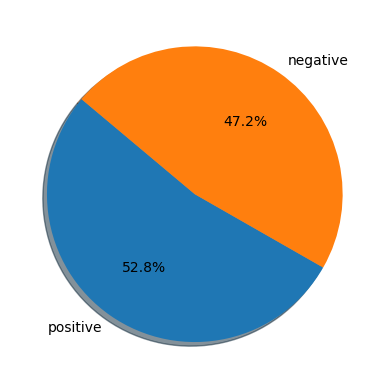

In [8]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()


* Print the count of positive and negative tweets

In [9]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


/tmp/ipykernel_12296/3766837793.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
/tmp/ipykernel_12296/3766837793.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [10]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

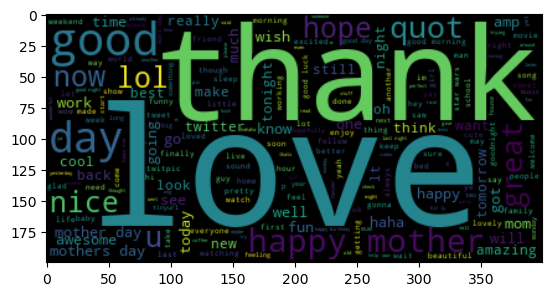

In [11]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")

* ... and in negative tweets?

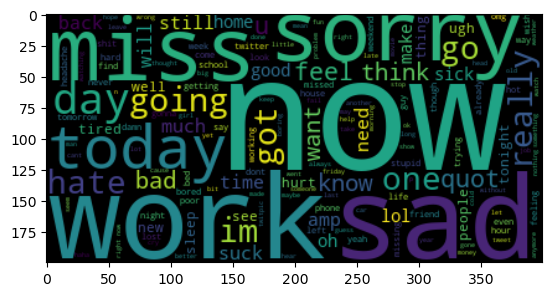

In [12]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")

That's it for this section! 

See you in `Section 2` where we will talk about Text Normalization and get our hands dirty with some real tweets!


<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [13]:
import re

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [14]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [15]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub("^RT\s+", default_replace, tweet)
    return tweet

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12296/3280637317.py:2: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub("^RT\s+", default_replace, tweet)


In [16]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [17]:
def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub("\B@\w+", default_replace, tweet)
    return tweet

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
/tmp/ipykernel_12296/885926399.py:2: SyntaxWarning: invalid escape sequence '\B'
  tweet = re.sub("\B@\w+", default_replace, tweet)


In [18]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

In [19]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


* Import the installed package

In [20]:
import emoji

* Replace emojis with a meaningful text

In [21]:
def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [22]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [23]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

<>:2: SyntaxWarning: invalid escape sequence '\/'
<>:2: SyntaxWarning: invalid escape sequence '\/'
/tmp/ipykernel_12296/933450514.py:2: SyntaxWarning: invalid escape sequence '\/'
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)


In [24]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [25]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [26]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


In [27]:
print(tweet)
def cleaned_tweet(tweet):
    tweet = replace_retweet(tweet, default_replace="")
    tweet = replace_user(tweet, default_replace="twitteruser")
    tweet = demojize(tweet)
    tweet = replace_url(tweet, default_replace="")
    tweet = replace_hashtag(tweet, default_replace="")
    return tweet
cleaned_tweet(tweet)
    

RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


'twitteruser I love this! :thumbs_up:  NLP Fun'

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [28]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [29]:
def to_lowercase(tweet):
    return tweet.lower()

In [30]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [31]:
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

In [32]:
print("Processed tweet: {}".format(word_repetition(tweet)))



Processed tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [33]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.!])', default_replace, tweet)
    return tweet

In [34]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

* Install the `contractions` package

In [35]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


* Import the installed package

In [36]:
import contractions

* Use `contractions_dict` to list most common contractions

In [37]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [38]:
def _fix_contractions(tweet):
    for k, v in contractions.contractions_dict.items():
        tweet = tweet.replace(k, v)
    return tweet

In [39]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [40]:
def fix_contractions(tweet):
    return contractions.fix(tweet)

In [41]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


In [42]:
print(tweet)
def final(tweet):
    tweet = to_lowercase(tweet)
    tweet = word_repetition(tweet)
    tweet = punct_repetition(tweet, default_replace="")
    tweet = fix_contractions(tweet)
    return tweet

final(tweet)

LOOOOOOOOK at this ... I'd like it so much!


'look at this . i would like it so much!'

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

In [43]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [44]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/copper_turtle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple tweet to be tokenized

In [45]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [46]:
def tokenize(tweet):
    tokens = word_tokenize(tweet)
    return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [47]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

* Import the `string` package 

In [48]:
import string

* Retrieve english punctuation signs by using the `string` package

In [49]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [50]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/copper_turtle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of english stopwords

In [51]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'an', 'at', 'so', 'against', "should've", 'ain', "couldn't", 'having', 'below', 'o', 'few', 't', 'after', 'just', "mustn't", 'the', "mightn't", 'his', 'by', 'too', 'will', 'now', "shan't", 'any', 'don', "hadn't", 'they', "you've", "she's", 'all', 'mightn', 'me', 'doing', 'here', 'didn', 'mustn', 'again', 'through', 'of', 'shan', 'does', 'him', 'and', 'whom', 'once', 'where', 'most', 'won', 'same', 'been', 'll', "hasn't", 'hadn', "won't", 'ours', 'couldn', 'what', 'which', 'both', "doesn't", 'for', 'ourselves', 'has', 'there', 'on', "didn't", 'further', 'to', 'hasn', 'my', 'more', 'should', 'aren', 'being', 'be', 'that', 'needn', 'its', 'between', 'did', 'we', 'only', 'was', 'their', 'with', 'above', 'y', 'as', 'in', 'how', 'other', "you'd", 'such', 'm', "needn't", 'while', 'have', 'were', 'under', "aren't", 'then', 'why', 'over', "weren't", 'into', 'ma', 'our', "you're", 'them', 'am', 'can', 's', 'yourself', 'a', 'd', 'isn', 'wasn', 'down', 'because', 'i', 'he', 'she', 'himself', 'up'

* Remove some stopwords from the set

In [52]:
stop_words.discard('not')

print(stop_words)


{'an', 'at', 'so', 'against', "should've", 'ain', "couldn't", 'having', 'below', 'o', 'few', 't', 'after', 'just', "mustn't", 'the', "mightn't", 'his', 'by', 'too', 'will', 'now', "shan't", 'any', 'don', "hadn't", 'they', "you've", "she's", 'all', 'mightn', 'me', 'doing', 'here', 'didn', 'mustn', 'again', 'through', 'of', 'shan', 'does', 'him', 'and', 'whom', 'once', 'where', 'most', 'won', 'same', 'been', 'll', "hasn't", 'hadn', "won't", 'ours', 'couldn', 'what', 'which', 'both', "doesn't", 'for', 'ourselves', 'has', 'there', 'on', "didn't", 'further', 'to', 'hasn', 'my', 'more', 'should', 'aren', 'being', 'be', 'that', 'needn', 'its', 'between', 'did', 'we', 'only', 'was', 'their', 'with', 'above', 'y', 'as', 'in', 'how', 'other', "you'd", 'such', 'm', "needn't", 'while', 'have', 'were', 'under', "aren't", 'then', 'why', 'over', "weren't", 'into', 'ma', 'our', "you're", 'them', 'am', 'can', 's', 'yourself', 'a', 'd', 'isn', 'wasn', 'down', 'because', 'i', 'he', 'she', 'himself', 'up'

* Create a `custom_tokenize` function

In [53]:
def custom_tokenize(tweet, keep_punct = False, keep_alnum = False, keep_stop = False):
    token_list = word_tokenize(tweet)
    
    if not keep_punct:
        token_list = [token for token in token_list if token not in string.punctuation]
        
    if not keep_alnum:
        token_list = [token for token in token_list if token.isalpha()]
    
    if not keep_stop:
        stop_words = set(stopwords.words('english'))
        stop_words.discard('not')
        token_list = [token for token in token_list if not token in stop_words]
        
          
    
    return token_list

* Test the function with a particular tweet

In [54]:
tweet = "these are 5 different words!"

In [55]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [56]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [57]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [58]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')


* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [59]:
def stem_tokens(tokens, stemmer):
    token_list = []
    for token in tokens:
        token_list.append(stemmer.stem(token))
    return token_list

* Print the different results and compare the stemmed tokens

In [60]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [61]:
tokens = ["international", "companies", "had", "interns"]

In [62]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [63]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/copper_turtle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [64]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [65]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [66]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [67]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
    token_list = []
    for token in tokens:
        token_list.append(lemmatizer.lemmatize(token, word_type[token]))
    return token_list

In [68]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [69]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [70]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))
  print(tweet)



  ## Twitter Features
    # replace retweet
  tweet = replace_retweet(tweet, default_replace="")
  # replace user tag
  tweet = replace_user(tweet, default_replace="twitteruser")
  # replace url
  tweet = replace_url(tweet, default_replace="")
  # replace hashtag
  tweet = replace_hashtag(tweet, default_replace="")
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
    # lower case
  tweet = to_lowercase(tweet)
    # replace contractions
  tweet = fix_contractions(tweet)
    # replace punctuation repetition
  tweet = punct_repetition(tweet, default_replace="")
    # replace word repetition
  tweet = word_repetition(tweet)
    # replace emojis
  tweet = demojize(tweet)
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
    # tokenize
  tokens = custom_tokenize(tweet, keep_alnum=True)
    # define stemmer
    # stem tokens
  stem = stem_tokens(tokens, SnowballStemmer("english"))
  return stem

* Test your `process_tweet` function!

In [71]:
print(process_tweet(complex_tweet, verbose=False))

RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun
['twitterus', 'look', 'big', 'complex', 'tweet', 'thumbs_up', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [72]:
import random

In [73]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: Another water leak in my appartement. The good side is that I get to meet the girls previous &amp; next floors
Another water leak in my appartement. The good side is that I get to meet the girls previous &amp; next floors
Post Twitter processing tweet: Another water leak in my appartement. The good side is that I get to meet the girls previous &amp; next floors
Post Word processing tweet: another water leak in my appartement. the good side is that i get to meet the girls previous &amp; next floors
['anoth', 'water', 'leak', 'appart', 'good', 'side', 'get', 'meet', 'girl', 'previous', 'amp', 'next', 'floor']


Initial tweet: @DazzlesPR oh phew you scared me. I wont have ANY access when im in mexico
@DazzlesPR oh phew you scared me. I wont have ANY access when im in mexico
Post Twitter processing tweet: twitteruser oh phew you scared me. I wont have ANY access when im in mexico
Post Word processing tweet: twitteruser oh phew you scared me. i will not have any access when i

That's it for this section! 

See you in `Section 3` where we will talk about Text Representation and get close to predicting real tweet sentiment!


<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 3` Text Representation </h2>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.1** Processing Tweets

* Install the `Scikit-Learn` package which is very useful for a lot of different ML tasks. 
* **Note:** make sure it is installed and up-to-date (once installed/updated, you might be asked to reload Colab). 

In [74]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


* Apply `process_tweet` function created in section 2 to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [75]:
df["tokens"] = df["tweet_text"].apply(process_tweet);
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == 'positive' else 0)

df.head(10)

Layin n bed with a headache  ughhhh...waitin on your call...
Funeral ceremony...gloomy friday...
wants to hang out with friends SOON!
Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends
Hmmm. http://www.djhero.com/ is down
@charviray Charlene my love. I miss you
@kelcouch I'm sorry  at least it's Friday?
Choked on her retainers
Ugh! I have to beat this stupid song to get to the next  rude!
@BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol
So sleepy again and it's not even that late. I fail once again.
@PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know
How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend
On my way home n having 2 deal w underage girls drinking gin on da bus while talking bout keggers......damn i feel old
@IsaacMascote  i'm sorry people ar

textID                                         tweet_text sentiment  \
0  1956967666  Layin n bed with a headache  ughhhh...waitin o...  negative   
1  1956967696                Funeral ceremony...gloomy friday...  negative   
2  1956967789               wants to hang out with friends SOON!  positive   
3  1956968477  Re-pinging @ghostridah14: why didn't you go to...  negative   
4  1956968636               Hmmm. http://www.djhero.com/ is down  negative   
5  1956969035            @charviray Charlene my love. I miss you  negative   
6  1956969172         @kelcouch I'm sorry  at least it's Friday?  negative   
7  1956969531                            Choked on her retainers  negative   
8  1956970047  Ugh! I have to beat this stupid song to get to...  negative   
9  1956970424  @BrodyJenner if u watch the hills in london u ...  negative   

                                              tokens  tweet_sentiment  
0        [layin, n, bed, headach, ughh.waitin, call]                0  
1                   [funer, ceremony.gloomi, friday]                0  
2                         [want, hang, friend, soon]                1  
3  [re-ping, twitterus, not, go, prom, bf, not, l...                0  
4                                              [hmm]                0  
5                   [twitterus, charlen, love, miss]                0  
6                  [twitterus, sorri, least, friday]                0  
7                                    [choke, retain]                0  
8         [ugh, beat, stupid, song, get, next, rude]                0  
9  [twitterus, watch, hill, london, realis, tourt...                0

* Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)







In [76]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [77]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'ughh.waitin', 'call'], ['funer', 'ceremony.gloomi', 'friday'], ['want', 'hang', 'friend', 'soon'], ['re-ping', 'twitterus', 'not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['twitterus', 'charlen', 'love', 'miss'], ['twitterus', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['twitterus', 'watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['twitterus', 'ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'off.damn', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', '2', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'keggers.damn', 'feel', 'old'], ['twitterus', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', '80', 'koxp

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [78]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [79]:
def build_freqs(tweet_list, sentiment_list):
    freqs = {}
    for tweet, sentiment in zip(tweet_list, sentiment_list):
        for word in tweet:
            pair = (word, sentiment)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

* Build the frequency dictionnary on the corpus by using the function

In [80]:
freqs = build_freqs(corpus, sentiment)

In [81]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Build the frequency dictionnary on the entire dataset by using the function

In [82]:
freqs_all = build_freqs(X, y)

In [83]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1359
Frequency of word 'love' in - tweets: 67


* Create a `tweet_to_freqs` function used to convert tweets to a 2-d array by using the frequency dictionnary

In [84]:
def tweet_to_freq(tweet, freqs):
    x = np.zeros((2,))
    for word in tweet:
        if (word, 1) in freqs:
            x[0] += freqs[(word, 1)]
        if (word, 0) in freqs:
            x[1] += freqs[(word, 0)]
    return x

* Print the 2-d vector by using the `tweet_to_freqs` function and the *corpus* dictionnary

In [85]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


* Print the 2-d vector by using the `tweet_to_freqs` function and the *dataset* dictionnary

In [86]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[1359.   67.]


* Plot word vectors in a chart and see where they locate

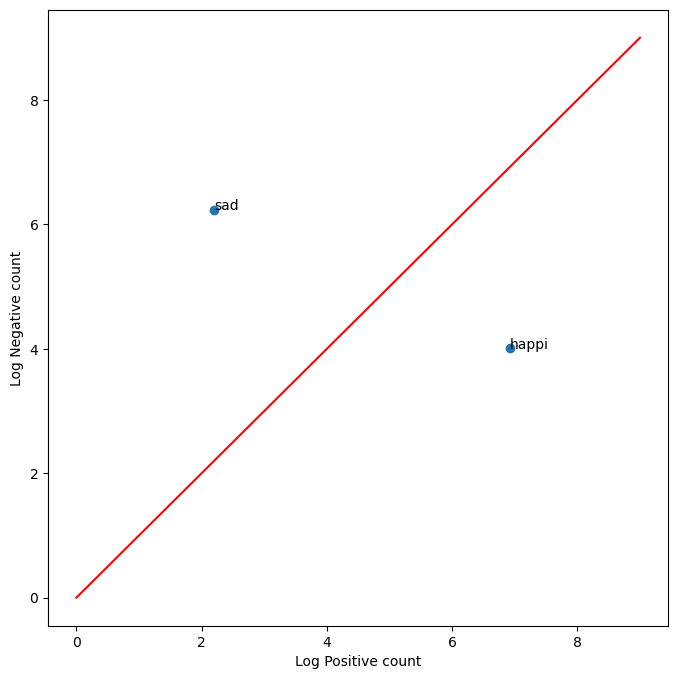

In [87]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Bag of Word

* Corpus of tweet tokens used for the second method

In [88]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from the Scikit-learn Library

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [90]:
def fit_cv(tweet_corpus):
    cv_vect = CountVectorizer(tokenizer=lambda x: x,
                              preprocessor=lambda x: x)
    cv_vect.fit(tweet_corpus)
    
    
    return  cv_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus

In [91]:
cv_vect = fit_cv(corpus)

/home/copper_turtle/anaconda3/envs/ai_ml/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Get the vectorizer features (matrix columns)

In [92]:
ft = cv_vect.get_feature_names_out()

In [93]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Convert the corpus to a matrix by using the vectorize

In [94]:
cv_mtx = cv_vect.transform(corpus)

* Print the matrix shape

In [95]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


* Convert the matrix to an array

In [96]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

* Transform a new tweet by using the vectorizer

In [97]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [98]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.4** Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [99]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `TfidfVectorizer` from the Scikit-learn Library

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_tfidf` function used to build the TF-IDF vectorizer with the corpus

In [101]:
def fit_tfid(tweet_corpus):
    tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                              tokenizer=lambda x: x)
    tf_vect.fit(tweet_corpus)
    return tf_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus

In [102]:
tf_vect = fit_tfid(corpus)
tf_mtx = tf_vect.transform(corpus)

* Get the vectorizer features (matrix columns)

In [103]:
print(tf_mtx.shape)

(6, 13)


In [104]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Print the matrix shape

In [105]:
print(tf_mtx.shape)

(6, 13)


* Convert the matrix to an array

In [106]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

* Transform a new tweet by using the vectorizer

In [107]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

That's it for this section! 

See you in `Section 4` where we finally build our sentiment model!


<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 4` Sentiment Model

## Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [108]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Train/Test Split

* Check what X and y looks like

In [109]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'ughh.waitin', 'call'], ['funer', 'ceremony.gloomi', 'friday'], ['want', 'hang', 'friend', 'soon'], ['re-ping', 'twitterus', 'not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['twitterus', 'charlen', 'love', 'miss'], ['twitterus', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['twitterus', 'watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['twitterus', 'ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'off.damn', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', '2', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'keggers.damn', 'feel', 'old'], ['twitterus', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', '80', 'koxp

* Import the `train_test_split` function from the Scikit-Learn package

In [110]:
from sklearn.model_selection import train_test_split

* Use the `train_test_split` function to split arrays of X and y into training and testing variables

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                    train_size=0.80)

* Print the size of these news variables

In [112]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


* Print random tweets, just to verify everything goes as expected

In [113]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['twitterus', 'shoutout', 'holland', 'pleas', 'got', 'lot', 'fan']
Sentiment: 1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.2** Logistic Regression

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.1** Model

* Import the `LogisticRegression` model from Scikit-Learn

In [114]:
from sklearn.linear_model import LogisticRegression

* Create a `fit_lr` function used to fit a Logistic Regression model on X and y *training* data

In [115]:
def fit_lr(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px>  **4.2.2** Pos/Neg Frequency

* Use the `build_freqs` function on training data to create a frequency dictionnary
* Use the frequency dictionnary together with the `tweet_to_freq` function to convert X_train and X_test data to 2-d vectors

In [116]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs)]

* Fit the Logistic Regression model on training data by using the `fit_lr` function
* Print the model coefficients (betas and intercept)

In [117]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00112155 -0.00136211]] [-0.26609888]


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.3** Count Vector

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [118]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)


/home/copper_turtle/anaconda3/envs/ai_ml/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [119]:
model_lr_cv = fit_lr(X_train_cv, y_train)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.4** TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [120]:
tf = fit_tfid(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/home/copper_turtle/anaconda3/envs/ai_ml/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [121]:
model_lr_tf = fit_lr(X_train_tf, y_train)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.3** Performance Metrics

* Import the `accuracy score` and `confusion matrix` from Scikit-Learn

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.1** Positive/Negative Frequencies

* Use the fitted `model_lr_pn` (positive/negative frequencies) to predict X_test



In [123]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

* Print the model accuracy by comparing predictions and real sentiments

In [124]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

ValueError: Found input variables with inconsistent numbers of samples: [3746, 1]

* Plot the confusion matrix by using the `plot_confusion` helper function

In [125]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

ValueError: Found input variables with inconsistent numbers of samples: [3746, 1]

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.2** Count Vector

* Use the fitted `model_lr_cv` (Bag-of-words) to predict X_test



In [127]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

* Print the model accuracy by comparing predictions and real sentiments

In [128]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.87%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/home/copper_turtle/anaconda3/envs/ai_ml/lib/python3.12/site-packages/seaborn/__init__.py'>

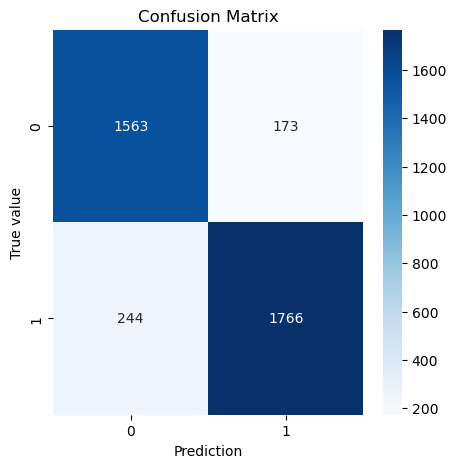

In [129]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.3** TF-IDF

* Use the fitted `model_lr_tf` (TF-IDF) to predict X_test



In [130]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Print the model accuracy by comparing predictions and real sentiments

In [131]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.55%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/home/copper_turtle/anaconda3/envs/ai_ml/lib/python3.12/site-packages/seaborn/__init__.py'>

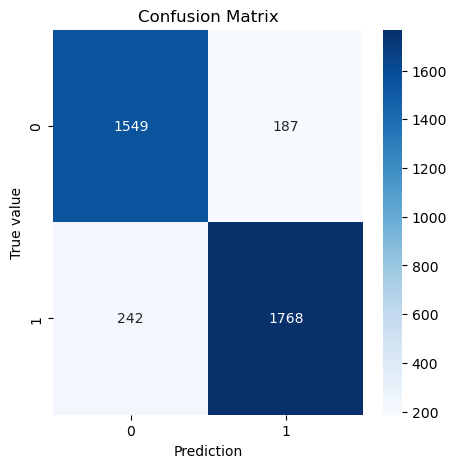

In [132]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## **4.4** Mini-Pipeline


* Final tweet used to check if the model works as well as expected
* **Note:** don't hesitate to input your own tweet!

In [133]:
your_tweet = """I love the state of the world"""

* Create a `predict_tweet` function used to pre-process, transform and predict tweet sentiment

In [134]:
def predict_tweet(tweet):
    processed_tweet = process_tweet(tweet)
    transformed_tweet = tf.transform([processed_tweet])
    prediction = model_lr_tf.predict(transformed_tweet)
    
    if prediction == 1:
        return "Prediction pos"
    else:
        return "Predict negative"

* ... Predict your tweet sentiment by using the `predict_tweet` function!

In [135]:
predict_tweet(your_tweet)

I love the state of the world


'Prediction pos'

# Thank you!

That's it for this course! I hope you enjoyed it as much as I did! Most importantly, I hope you learned some new things about Text Mining, NLP and Sentiment Analysis.

See you next time!

**AI_Outsider**

Don't forget to visit https://AiOutsider.com for more!


<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>